In [7]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Titanic
Vamos a crear un modelo que prediga la probabilidad de supervivencia de los pasajeros. Los datos están disponibles en:

https://www.kaggle.com/c/titanic/data?select=train.csv

## Preparación de los datos
Comenzamos importando los datos de training y testing y agregamos a la tabla de testing la columna survived proveniente de la tabla gender_submission

In [14]:
data_train = pd.read_csv("train.csv")

In [16]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
data_test = pd.read_csv("test.csv")
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [20]:
gender_submission = pd.read_csv("gender_submission.csv")
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [22]:
data_test = data_test.merge(
    gender_submission,
    left_on = "PassengerId",
    right_on = "PassengerId",
    how = "left"
)
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


A continuación, analizamos los valores nulos.

In [25]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
data_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

In [29]:
data_train.isnull().sum()/len(data_train)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [31]:
data_test.isnull().sum()/len(data_test)

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
Survived       0.000000
dtype: float64

* En Age tenemos 177 + 86 datos nulos - sobre 20%
* En Cabin tenemos 687 + 327 datos nulos - sobre 80%
* En Embarked hay 2 nulos
* En Fare hay 1 nulo

* La Columna Cabin tiene un 80% de datos nulos, además es un información que no se puede estimar. --> ELIMINAR
* La columna Age tiene un 20% de datos nulos y puede representar un factor relevante para la supervivencia --> COMPLETAR
* Los nulos de Fare y Embarked son despreciables --> aunque se podrían eliminar las filas porque no afectan mucho al resultado, las vamos a COMPLETAR

### Cabin

In [36]:
# Eliminamos Cabin
data_train.drop(columns = "Cabin", inplace = True)
data_test.drop(columns = "Cabin", inplace = True)
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


### Age

In [38]:
# Vemos como se distribuyen los datos de Age:
data_train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

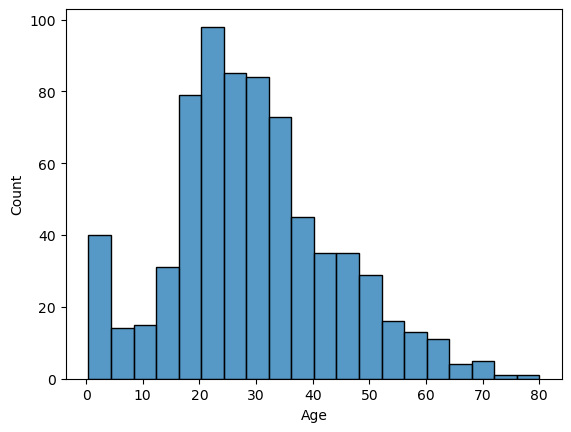

In [40]:
sns.histplot(x=data_train.Age, )

In [38]:
# Vemos la edad promedio por sexo
data_edad = data_train.groupby("Sex").mean("Age")
# No hay mucha variación

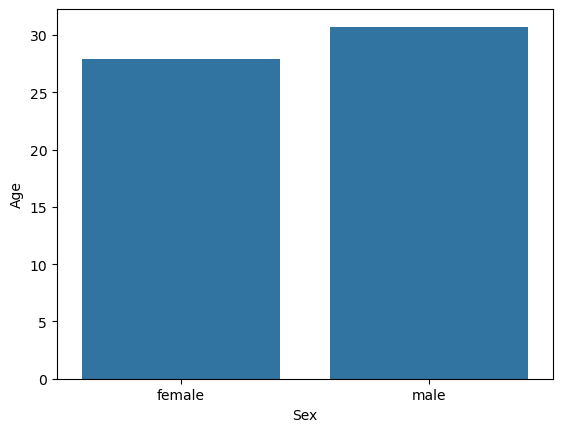

In [42]:
sns.barplot(
    data = data_edad,
    x = "Sex",
    y = "Age"
)
plt.show()

In [44]:
# No se aprecian diferencias de edad por sexo.
# Vemos la edad promedio por clase
data_clase = data_train.groupby("Pclass").mean("Age")

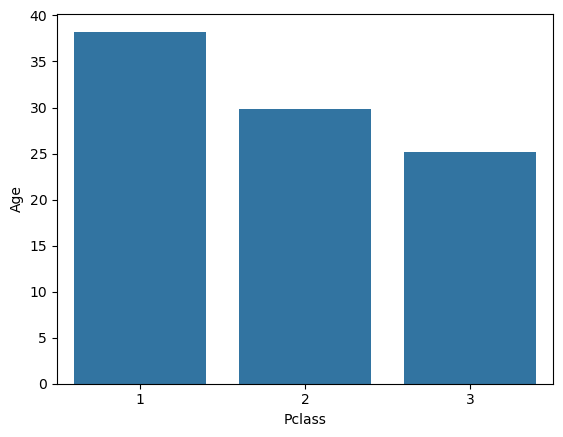

In [46]:
sns.barplot(
    data = data_clase,
    x = "Pclass",
    y = "Age"
)
plt.show()

In [48]:
# Se oberva diferencia significativa de la edad promedio según la clase. Por tanto, completamos los datos con el promedio por clase:

In [50]:
data_clase.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [52]:
data_test.groupby("Pclass").mean("Age")

,PassengerId,Age,SibSp,Parch,Fare,Survived
Pclass,,,,,,
1,1098.224299,40.918367,0.476636,0.383178,94.280297,0.467290
2,1117.935484,28.777500,0.376344,0.344086,22.202104,0.322581
3,1094.178899,24.027945,0.463303,0.417431,12.459678,0.330275


In [ ]:
# 1 --> 40
# 2 --> 30
# 3 --> 25

In [54]:
data_train.loc[data_train["Pclass"] == 1, "Age"] = data_train.loc[data_train["Pclass"] == 1, "Age"].fillna(40)
data_train.loc[data_train["Pclass"] == 2, "Age"] = data_train.loc[data_train["Pclass"] == 2, "Age"].fillna(30)
data_train.loc[data_train["Pclass"] == 3, "Age"] = data_train.loc[data_train["Pclass"] == 3, "Age"].fillna(25)
data_test.loc[data_test["Pclass"] == 1, "Age"] = data_test.loc[data_test["Pclass"] == 1, "Age"].fillna(40)
data_test.loc[data_test["Pclass"] == 2, "Age"] = data_test.loc[data_test["Pclass"] == 2, "Age"].fillna(30)
data_test.loc[data_test["Pclass"] == 3, "Age"] = data_test.loc[data_test["Pclass"] == 3, "Age"].fillna(25)

### Fare

In [56]:
# Para completar Fare, visualizamos la fila la fila
data_test.loc[data_test["Fare"].isnull(), :]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S,0


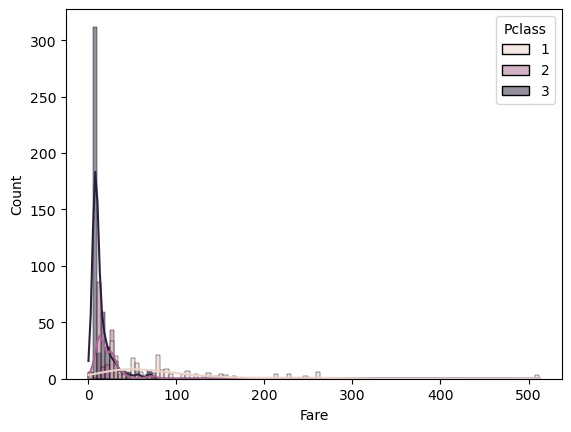

In [62]:
# Observamos su distribución
sns.histplot( x = data_train.Fare, hue = data_train.Pclass, kde = True)
plt.show()

In [64]:
# Buscamos el pormedio por clase:
data_test.groupby("Pclass").mean("Fare")

,PassengerId,Age,SibSp,Parch,Fare,Survived
Pclass,,,,,,
1,1098.224299,40.841121,0.476636,0.383178,94.280297,0.467290
2,1117.935484,28.843226,0.376344,0.344086,22.202104,0.322581
3,1094.178899,24.348991,0.463303,0.417431,12.459678,0.330275


In [66]:
# competo el Fare faltante con 13
data_test["Fare"] = data_test["Fare"].fillna(13)

In [68]:
# Opción, usar la mediana de la clase 3
# mediana = test_data.loc[test_data.Pclass == 3, "Fare"].median()
# test_data.Fare = test_data.Fare.fillna(mediana) 

### Embarked

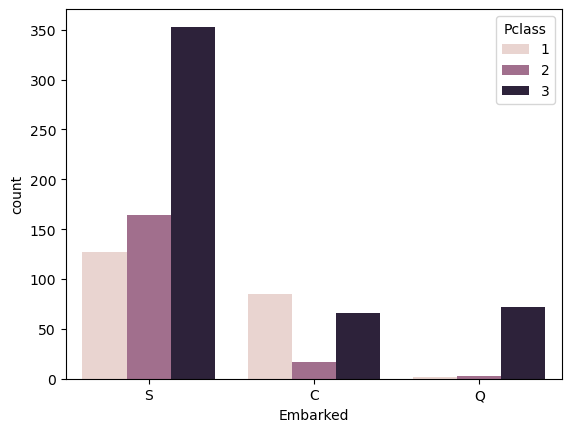

In [78]:
# Veo gráficamente distribución de Embarked
sns.countplot( x = data_train.Embarked, hue = data_train.Pclass)
plt.show()

In [80]:
# Visualizamos las filas las filas
data_train.loc[data_train["Embarked"].isnull(), :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [82]:
# Como son de clase 1, visualizamos Embarked de calse 1
data_train.loc[data_train["Pclass"] == 1, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,S
...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S


In [84]:
# parece que son C y S 
data_train["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [86]:
data_train.groupby("Embarked").count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
Embarked,,,,,,,,,,
C,168,168,168,168,168,168,168,168,168,168
Q,77,77,77,77,77,77,77,77,77,77
S,644,644,644,644,644,644,644,644,644,644


In [88]:
# la mayoría es S, así que completamos con S
data_train["Embarked"] = data_train["Embarked"].fillna("S")

### Comprobación

In [91]:
data_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [93]:
data_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
dtype: int64

In [194]:
# Ya no hay nulos

## Análisis exploratorio

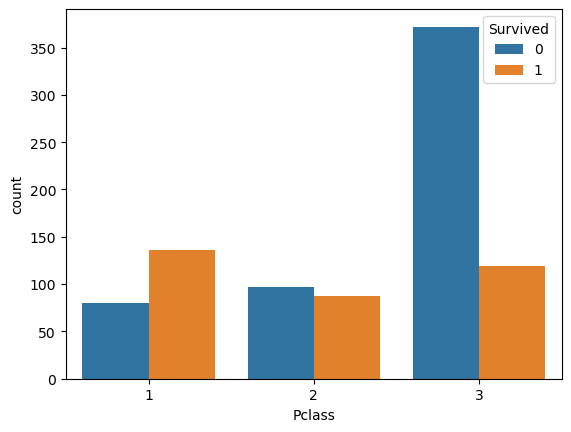

In [96]:
sns.countplot (data = data_train, x = "Pclass", hue = "Survived")
plt.show()

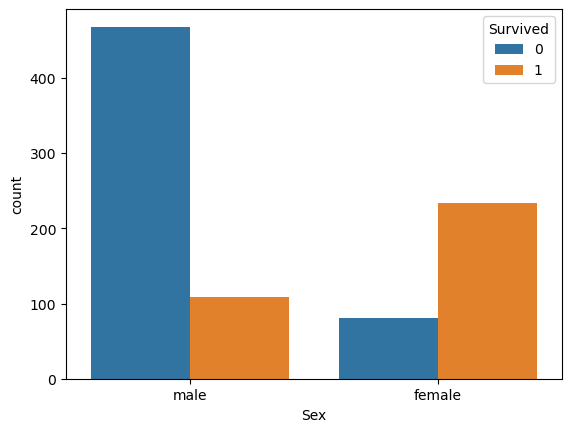

In [101]:
sns.countplot (data = data_train, x = "Sex", hue = "Survived")
plt.show()

(0.0, 100.0)

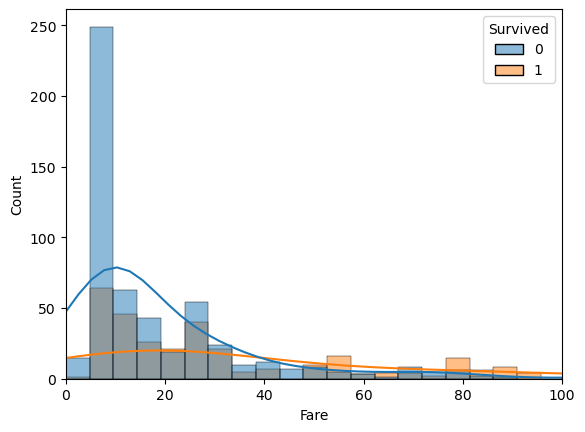

In [74]:
# Fare
sns.histplot(x =data_train.Fare, hue = data_train.Survived, kde = True)
plt.xlim((0,100))

## Selección de columnas y generación de variables dummies

In [106]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [108]:
data_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

* Pclass es un valor numérico pero en realidad es una categoría --> DUMMIE
* Name, es categoría pero NO se puede transformar a Dummie --> ELIMINAR
* Sex, es una categoría --> DUMMIE
* Ticket, es categoría pero NO se puede tarnsformar a Dummie --> ELIMINAR
* Embarked, es una categoría --> DUMMIE

In [111]:
data_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Survived'],
      dtype='object')

In [113]:
# Convertir dummies
data_train = pd.get_dummies(
    data_train,
    columns = ["Pclass", "Sex", "Embarked"],
    drop_first = True                                                         
)

In [115]:
data_test = pd.get_dummies(
    data_test,
    columns = ["Pclass", "Sex", "Embarked"],
    drop_first = True
)

In [117]:
# Eliminar Name y Ticket
data_train.drop(columns = ["Name","Ticket"], inplace = True)

In [121]:
data_test.drop(columns = ["Name","Ticket"], inplace = True)

In [123]:
# Eliminar PassengerId

In [125]:
data_train.drop(columns = "PassengerId", inplace = True)
data_test.drop(columns = "PassengerId", inplace = True)

In [127]:
# Visualizamos como ha quedado la tabla
data_test.head()

,Age,SibSp,Parch,Fare,Survived,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,34.5,0,0,7.8292,0,False,True,True,True,False
1,47.0,1,0,7.0000,1,False,True,False,False,True
2,62.0,0,0,9.6875,0,True,False,True,True,False
3,27.0,0,0,8.6625,0,False,True,True,False,True
4,22.0,1,1,12.2875,1,False,True,False,False,True


### Crear columna MENOR
Ser menor de 16 años en el Titanic incrementaba las posibilidades de supervivencia debido a la prioridad dada a mujeres y niños para ser evacuados primero, aunque este principio no fue aplicado de manera consistente en todos los casos, es un factor determinante a tener en consideración para determinar la probabilidad de supervivencia.
Por ello, agregamos una columna que contenga esta información.

In [131]:
data_train["IsMinor"] = np.where(data_train["Age"] <= 16, 1, 0)
data_test["IsMinor"] = np.where(data_test["Age"] <= 16, 1, 0)   

In [133]:
data_train.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,IsMinor
0,0,22.0,1,0,7.2500,False,True,True,False,True,0
1,1,38.0,1,0,71.2833,False,False,False,False,False,0
2,1,26.0,0,0,7.9250,False,True,False,False,True,0
3,1,35.0,1,0,53.1000,False,False,False,False,True,0
4,0,35.0,0,0,8.0500,False,True,True,False,True,0


## Crear el modelo
Vamos a definir un modelo de regresión logística, ya que es un modelo muy apropiado para problemas de clasificación binaria, donde el objetivo es predecir la probabilidad de que una observación pertenezca a una de dos clases posibles, en este caso: Sobrevive / NO Sobrevive.


- Es un modelo sencillo, fácil de implementar y con una base teórica sólida.
- Es eficiente incluso en problemas con grandes cantidades de datos.
- Los resultados del modelo son fácilmente interpretables y se pueden entender en términos de cómo las variables influyen en la probabilidad de la clase.

In [140]:
# Importamos librerias
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [142]:
data_test.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'Survived', 'Pclass_2', 'Pclass_3',
       'Sex_male', 'Embarked_Q', 'Embarked_S', 'IsMinor'],
      dtype='object')

In [144]:
# Creamos las variables X e y para el modelo:
X_train = data_train.loc[:,data_train.columns != "Survived"]
y_train = data_train.loc[:, "Survived"]
X_test = data_test.loc[:,data_test.columns != "Survived"]
y_test = data_test.loc[:, "Survived"]

In [146]:
# Creamos un selector
selector = RFE(
    LogisticRegression(max_iter = 10000000),           
    n_features_to_select = 10                          
).fit(X_train, y_train)
selector.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [148]:
# Aunque hemos seleccionado todas las variables, definimos X final por si quisieramos probar con otro númeor de variables:
X_train_final = X_train.loc[:, selector.support_]
X_test_final = X_test.loc[:, selector.support_]
X_train_final

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,IsMinor
0,22.0,1,0,7.2500,False,True,True,False,True,0
1,38.0,1,0,71.2833,False,False,False,False,False,0
2,26.0,0,0,7.9250,False,True,False,False,True,0
3,35.0,1,0,53.1000,False,False,False,False,True,0
4,35.0,0,0,8.0500,False,True,True,False,True,0
...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,13.0000,True,False,True,False,True,0
887,19.0,0,0,30.0000,False,False,False,False,True,0
888,25.0,1,2,23.4500,False,True,False,False,True,0
889,26.0,0,0,30.0000,False,False,True,False,False,0


In [150]:
# Creamos el modelo
logreg = LogisticRegression(max_iter = 10000)
logreg.fit(X_train_final, y_train)

LogisticRegression(max_iter=10000)

## Validación del modelo

9. Validar el modelo con datos de testing, agregar dos columnas a test_data:
    * predicción: valor 0 o 1
    * probabilidad_prediccion: valor de la probabilidad devuelta por el modelo

In [158]:
# Hacemos predicciones con los datos de test
y_pred = logreg.predict(X_test_final)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [160]:
# Agregamos el resultado a la tabla
data_test["predicción"] = y_pred

In [162]:
# Calculamos la probabilidad de supervivencia
y_pred_proba = logreg.predict_proba(X_test_final)[:,1]          
y_pred_proba

array([0.10895801, 0.36237548, 0.16288888, 0.09578609, 0.49302511,
       0.27233539, 0.65339752, 0.18378968, 0.73003612, 0.05687482,
       0.10028113, 0.32446951, 0.9106341 , 0.08771465, 0.83154375,
       0.84761548, 0.28879598, 0.15432245, 0.49397349, 0.56690119,
       0.2989502 , 0.26385404, 0.88742558, 0.57586722, 0.90511641,
       0.0379586 , 0.94767283, 0.14913477, 0.3584939 , 0.07329566,
       0.11999104, 0.15914162, 0.39012057, 0.44498904, 0.45345438,
       0.16329742, 0.60390043, 0.62984556, 0.10083037, 0.11814341,
       0.08980302, 0.36123988, 0.06759419, 0.81796642, 0.83448043,
       0.1002911 , 0.42448976, 0.13629197, 0.88935533, 0.46170271,
       0.40010536, 0.34609237, 0.70501157, 0.85552269, 0.32853624,
       0.10220495, 0.07850502, 0.10019721, 0.07211273, 0.96873647,
       0.12141258, 0.23785276, 0.11851737, 0.70043157, 0.77806209,
       0.82243227, 0.72260685, 0.33223412, 0.51685665, 0.8010024 ,
       0.68905444, 0.11040481, 0.5778073 , 0.53283842, 0.96330

In [164]:
# Incluimos la probabilidad en la tabla
data_test["probabilidad_prediccion"] = y_pred_proba

In [166]:
data_test.head()

,Age,SibSp,Parch,Fare,Survived,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,IsMinor,predicción,probabilidad_prediccion
0,34.5,0,0,7.8292,0,False,True,True,True,False,0,0,0.108958
1,47.0,1,0,7.0000,1,False,True,False,False,True,0,0,0.362375
2,62.0,0,0,9.6875,0,True,False,True,True,False,0,0,0.162889
3,27.0,0,0,8.6625,0,False,True,True,False,True,0,0,0.095786
4,22.0,1,1,12.2875,1,False,True,False,False,True,0,0,0.493025


### Matriz de confusión

In [169]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [171]:
matriz_confusion = confusion_matrix(y_test, y_pred)
matriz_confusion

array([[252,  14],
       [ 16, 136]], dtype=int64)

In [173]:
# Guardamos los elemtos en sus variables:
TN = matriz_confusion[0][0]
TP = matriz_confusion[1][1]
FN = matriz_confusion[1][0]
FP = matriz_confusion[0][1]

### Accuracy

In [176]:
# Accuracy
(TN+TP) / (TN+TP+FN+FP)

0.9282296650717703

### Sensibilidad

In [180]:
# sensibilidad
TP / (TP + FN)

0.8947368421052632

### Especificidad

In [183]:
# especificidad
TN / (TN + FP)

0.9473684210526315

### Curva de ROC

In [187]:
especificidad_inv, sensibilidad, umbral = roc_curve(y_test, y_pred_proba)

<Axes: >

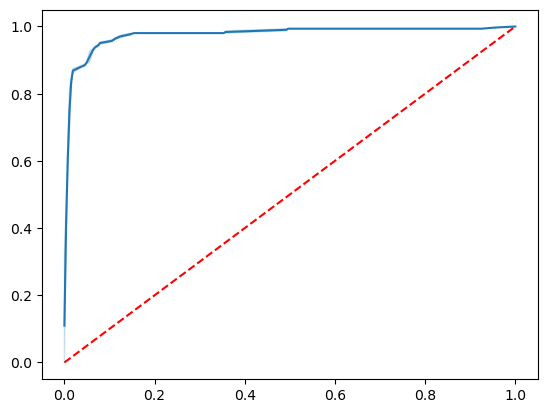

In [189]:
recta_x = [i * 0.01 for i in range(101)]
recta_y = recta_x
sns.lineplot(x = especificidad_inv, y = sensibilidad)
sns.lineplot(x = recta_x, y = recta_y, ls = "--", c = "r")

In [191]:
# calculo el area debajo de la curva
roc_auc_score(y_test, y_pred_proba)

0.9758607043925605

## Conclusión
Las métricas obtenidas durante la validación del modelo demuestran que hemos desarrollado un modelo de predicción de supervivencia altamente robusto, con una precisión del 92,82%, una sensibilidad del 89,47% y una especificidad del 94,74%. 

Estos resultados indican un excelente rendimiento general del modelo, equilibrando eficazmente la capacidad para identificar tanto a los sobrevivientes como a los no sobrevivientes, lo que sugiere que el modelo es confiable y adecuado para la tarea de predicción en este contexto.